# Predicción Final

In [1]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from keras.models import load_model


Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

## Cargar grupo de datos de pruebas

In [2]:
np.random.seed(1)

#cargamos los datos de entrada
#data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)
data = pd.read_csv("../05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)


# Ver los 1ros registros
data.head()


,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010


## Separar pruebas y test

In [3]:
data_train, data_test = train_test_split(data,test_size=0.2, random_state=200)

dataset_test = data_test.values
x_test = dataset_test[:,0:45]
y_test = dataset_test[:,45]

In [4]:
len(x_test)

19220

In [6]:
#df_pred = pd.DataFrame(data=x_test)

##df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_final_test.csv')
#df_pred.to_csv('../05.AnalisisDatos/Datos/pred_final_test.csv')




## Seleccionar 48 regristros

In [7]:
#x_test_fin = x_test[10000:10048]
#y_test_fin = y_test[10000:10048]

#x_test_fin = x_test[13372:13420]
#y_test_fin = y_test[13372:13420]


x_test_fin = x_test[100:148]
y_test_fin = y_test[100:148]


In [8]:
x_test_fin


array([[3.29e+00, 1.80e-01, 1.71e-01, ..., 6.00e-02, 6.00e-02, 6.00e-02],
       [6.93e+00, 4.81e-01, 4.41e-01, ..., 2.21e-01, 2.41e-01, 2.51e-01],
       [4.30e+00, 9.07e-01, 9.22e-01, ..., 6.52e-01, 4.21e-01, 3.91e-01],
       ...,
       [5.77e+00, 2.96e-01, 2.76e-01, ..., 2.26e-01, 2.54e-01, 2.81e-01],
       [3.63e+00, 5.00e-02, 6.00e-02, ..., 1.25e-01, 1.20e-01, 1.25e-01],
       [4.48e+00, 4.00e-03, 4.00e-03, ..., 3.83e-01, 3.76e-01, 3.69e-01]])

In [9]:
#import sys
#pred_arr_entry = np.array(x_test_fin)
#np.set_printoptions(threshold=sys.maxsize)
#pred_arr_entry

In [10]:
y_test_fin

array([0.06 , 0.271, 0.281, 0.075, 0.647, 0.241, 0.291, 0.762, 0.   ,
       0.276, 0.822, 0.421, 0.857, 0.57 , 0.291, 0.306, 0.015, 0.09 ,
       0.09 , 0.045, 0.   , 0.135, 0.06 , 0.787, 0.14 , 0.085, 0.528,
       0.04 , 0.466, 0.156, 0.   , 0.115, 0.296, 0.035, 0.231, 0.   ,
       0.065, 0.466, 0.266, 0.06 , 0.03 , 0.529, 0.321, 0.09 , 0.005,
       0.308, 0.185, 0.362])

## Cargar Mejor Modelo

In [12]:
# load the saved model
best_model = load_model('best_model_lstm_06_270.h5')

## Reshape datos de entrada

In [13]:
data= np.array(x_test_fin)

timesteps=1
#reshape
data48_re = data.reshape((data.shape[0], timesteps, data.shape[1]))
data48 = data48_re
data48

array([[[3.29e+00, 1.80e-01, 1.71e-01, ..., 6.00e-02, 6.00e-02,
         6.00e-02]],

       [[6.93e+00, 4.81e-01, 4.41e-01, ..., 2.21e-01, 2.41e-01,
         2.51e-01]],

       [[4.30e+00, 9.07e-01, 9.22e-01, ..., 6.52e-01, 4.21e-01,
         3.91e-01]],

       ...,

       [[5.77e+00, 2.96e-01, 2.76e-01, ..., 2.26e-01, 2.54e-01,
         2.81e-01]],

       [[3.63e+00, 5.00e-02, 6.00e-02, ..., 1.25e-01, 1.20e-01,
         1.25e-01]],

       [[4.48e+00, 4.00e-03, 4.00e-03, ..., 3.83e-01, 3.76e-01,
         3.69e-01]]])

In [14]:
#data48[0][0][0]

## Hacer Predicción

In [15]:
pred48=best_model.predict(data48)

## Visualizar Data de Predicción

In [16]:
pred_arr = []
for x in pred48:
    pred_arr.append(x[0])
    print(x[0])

0.055978656
0.26897624
0.2772614
0.07715171
0.78690195
0.03043586
0.2912936
0.73517317
0.00038518256
0.27475712
0.8821543
0.5029205
0.83927345
0.57430804
0.28884152
0.30206192
0.024295647
0.09400062
0.09193071
0.045653597
0.009602208
0.13613144
0.121074215
0.77458024
0.11400065
0.12679482
0.52195716
0.041157942
0.45556644
0.16009933
0.00031122658
0.117858335
0.29286787
0.03131465
0.22847754
0.00031122658
0.06561194
0.38996497
0.26269615
0.06826055
0.026552763
0.5162351
0.0459475
0.091942325
0.022109572
0.30406398
0.18556306
0.4051184


## Graficar Predicción y ver su correlación con lo real

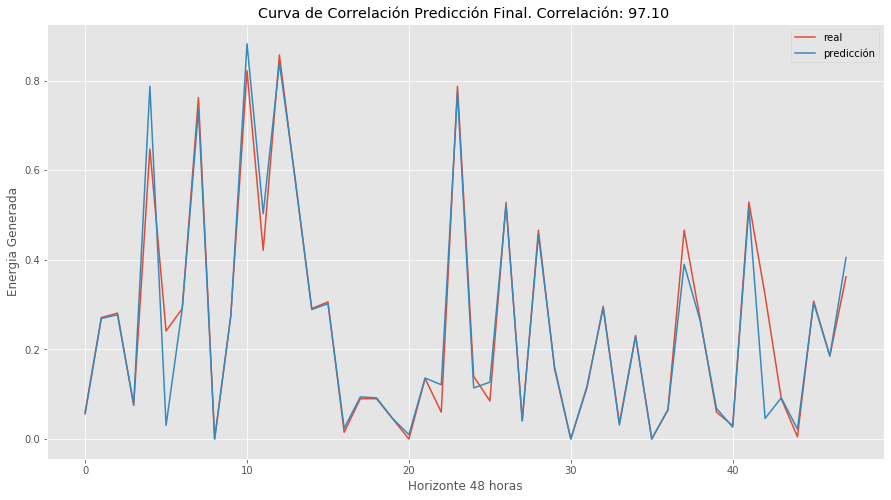

In [18]:
pred_arr_num = np.array(pred_arr)

corr = np.corrcoef(y_test_fin, pred_arr_num)

plt.plot(y_test_fin, label ="real")
plt.plot(pred_arr_num, label ="predicción")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Curva de Correlación Predicción Final. Correlación: %.2f " % ( corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Horizonte 48 horas")
plt.legend()
plt.show()